In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.datasets import fashion_mnist
import keras

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train , test_size = 0.15, random_state = 66)

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.reshape(-1,28*28)/255
x_test = x_test.reshape(-1,28*28)/255
X_val = x_val.reshape(-1,28*28)/255

In [4]:
model=Sequential()
model.add(Dense(512,input_shape=(28*28,),activation='ReLU'))
model.add(Dense(256))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))#output
model.compile(optimizer = 'adam', loss = 'SparseCategoricalCrossentropy', metrics = ['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [5]:
res = model.fit(x_train,
          y_train,
          batch_size=20,
          epochs = 16,
          validation_data = (X_val,y_val))

Epoch 1/16
2550/2550 [==============================] - 29s 11ms/step - loss: 0.5058 - accuracy: 0.8179 - val_loss: 0.4363 - val_accuracy: 0.8406
Epoch 2/16
2550/2550 [==============================] - 18s 7ms/step - loss: 0.3890 - accuracy: 0.8598 - val_loss: 0.3720 - val_accuracy: 0.8593
Epoch 3/16
2550/2550 [==============================] - 20s 8ms/step - loss: 0.3527 - accuracy: 0.8725 - val_loss: 0.3592 - val_accuracy: 0.8700
Epoch 4/16
2550/2550 [==============================] - 18s 7ms/step - loss: 0.3354 - accuracy: 0.8784 - val_loss: 0.3601 - val_accuracy: 0.8712
Epoch 5/16
2550/2550 [==============================] - 18s 7ms/step - loss: 0.3164 - accuracy: 0.8840 - val_loss: 0.3489 - val_accuracy: 0.8731
Epoch 6/16
2550/2550 [==============================] - 19s 7ms/step - loss: 0.3045 - accuracy: 0.8894 - val_loss: 0.3523 - val_accuracy: 0.8782
Epoch 7/16
2550/2550 [==============================] - 18s 7ms/step - loss: 0.2954 - accuracy: 0.8908 - val_loss: 0.3229 - val_a

In [9]:
model.save('/content/drive/MyDrive/saved/model.h5')

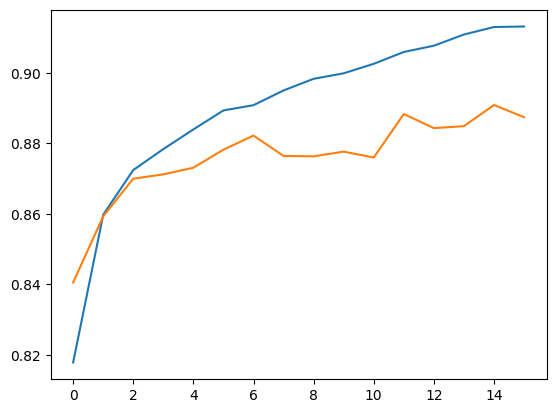

In [11]:
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])